<a href="https://colab.research.google.com/github/SaidMaj/AI-AND-DEEP-LEARNING-ASSGIMENT-SAID-MAJID-SAID-ALMAMRI/blob/main/defective_and_good_condition_tyres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # by using module we import drive which will allow us load drive.mount
drive.mount('/content/drive', force_remount=True) #this line used for authorization

Mounted at /content/drive


In [ ]:
#here I will definie the location of the dataset for both testing and training
train_directory = "/content/drive/MyDrive/defective_and_good_condition_tyres/Training" # here I am locating the training data set
test_directory = "/content/drive/MyDrive/defective_and_good_condition_tyres/Testing" # here I am locating the testing data set


In [ ]:
import os # os module allows python to intercat with the operating system and we import it to use
# listdir which allows us to ses the files whihc are avabile in the directory
# len returns the total numfer of files in each directory
print(len(os.listdir("/content/drive/MyDrive/defective_and_good_condition_tyres/Training/good")))
print(len(os.listdir("/content/drive/MyDrive/defective_and_good_condition_tyres/Training/defective")))
print(len(os.listdir("/content/drive/MyDrive/defective_and_good_condition_tyres/Testing/good")))
print(len(os.listdir("/content/drive/MyDrive/defective_and_good_condition_tyres/Testing/defective")))


688
688
140
140


In [ ]:
import tensorflow as tf # is a machine learning framework
from tensorflow.keras.preprocessing.image import ImageDataGenerator # I have used tensorflow.keras.preprocessing.image to be able to import ImageDataGenerator method whihc allows me to crreate different
#version of the same the image by changing the scale , and other factors such as hight, width, zoom_range

# create ImageDatagenerator for the training ser
train_datagen = ImageDataGenerator(
    rescale=1./255,  #The image are sacled in this percentage or normalization
    validation_split=0.2 # here 20% of training data will be used for validation
)


# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_directory, # the images which located in directory, will be seleccted
    target_size =(256, 256),
    batch_size = 32,
    class_mode = 'binary', # class mode mean the problem type in this is binary classification
    subset = 'training'  # the data will be used training purpose
)

# create ImageDatagenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,  #The image are sacled in this percentage or normalization
    validation_split=0.2 # here 20% of training data will be used for validation
)


# Load and prepare vaildation data
validation_data = train_datagen.flow_from_directory(
    train_directory, # the images which located in directory, will be seleccted
    target_size =(256, 256),
    batch_size = 32, # works as fillter
    class_mode = 'binary', # class mode mean the problem type in this is binary classification
    subset = 'validation'  # the data will be used training purpose
)



Found 1102 images belonging to 2 classes.
Found 274 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential # here we are importing Sequential model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
model = Sequential() #use the sequential model

#The layers which will be used
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',   input_shape=(256,256,3) ) ) # number of filters 32, each filter  size 3 * 3, padding value is valid which means no padding, activation funcation is relu input_shape 256*256*3
model.add(MaxPooling2D(pool_size=(2,2) , strides=2, padding='valid')) # the pool size 2 * 2, strides equals 2, padding value is valid which means no padding

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu')) # number of filters 32, each filter  size 3 * 3, padding value is valid which means no padding, activation funcation is relu
model.add(MaxPooling2D(pool_size=(2,2) , strides=2, padding='valid')) # the pool size 2 * 2, strides equals 2, padding value is valid which means no padding

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))  # number of filters 32, each filter  size 3 * 3, padding value is valid which means no padding, activation funcation is relu
model.add(MaxPooling2D(pool_size=(2,2) , strides=2, padding='valid')) # the pool size 2 * 2, strides equals 2, padding value is valid which means no padding

#Here the model is flatten
model.add(Flatten())

model.add(Dense(128, activation='relu')) #here is the first hiden layer
model.add(Dense(64, activation='relu')) # here the second hiden layer
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam # imported Adam to use it as optimizer
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
# Adam algorithm used for optimization, the learning rate is 0.001, loss is binary_crossentropy which is binary classification, metrics is accuracy

In [ ]:
history = model.fit(train_data, epochs=20, validation_data= validation_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 351s 10s/step - accuracy: 0.5755 - loss: 0.7173 - val_accuracy: 0.6022 - val_loss: 0.6331
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 215s 6s/step - accuracy: 0.6813 - loss: 0.6272 - val_accuracy: 0.6825 - val_loss: 0.5903
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 211s 6s/step - accuracy: 0.7295 - loss: 0.5698 - val_accuracy: 0.5876 - val_loss: 0.8276
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 208s 6s/step - accuracy: 0.7421 - loss: 0.5191 - val_accuracy: 0.6898 - val_loss: 0.6525
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 214s 6s/step - accuracy: 0.7644 - loss: 0.4829 - val_accuracy: 0.6679 - val_loss: 0.7064
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.8224 - loss: 0.4020 - val_accuracy: 0.6861 - val_loss: 1.0095
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 207s 6s/step - accuracy: 0.8432 - loss: 0.3398 - val_accuracy: 0.6569 - val_loss: 1.1384
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 218s 6s/step - accuracy: 0.8560 - loss: 0.3165 - val_accuracy: 0.6679 - 

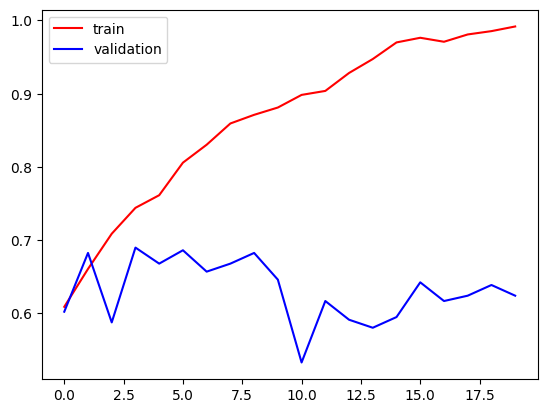

In [ ]:
import matplotlib.pyplot as plt
 # plot to see  the difference between accuracy and val_accuracy

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

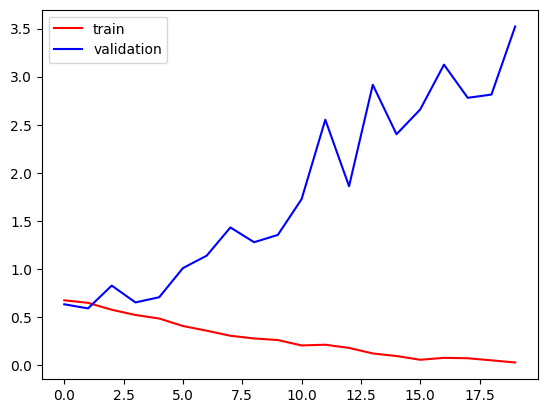

In [ ]:
 # plot to see  the difference between loss and val_loss

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255) #normalization rescale=1./255
test_data = test_datagen.flow_from_directory(
    test_directory,  # the images which located in directory, will be seleccted
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'  # class mode meean the problem type in this is binary classification
)

Found 280 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)


9/9 ━━━━━━━━━━━━━━━━━━━━ 52s 6s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[140   0]
 [140   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       140
           1       0.00      0.00      0.00       140

    accuracy                           0.50       280
   macro avg       0.25      0.50      0.33       280
weighted avg       0.25      0.50      0.33       280



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# create CNN model

model = Sequential() #use the sequential model

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) # number of filters 32, each filter  size 3 * 3, padding value is valid which means no padding, activation funcation is relu input_shape 256*256*3
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) # the pool size 2 * 2, strides equals 2, padding value is valid which means no padding

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')) # number of filters 32, each filter  size 3 * 3, padding value is valid which means no padding, activation funcation is relu input_shape 256*256*3
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) # the pool size 2 * 2, strides equals 2, padding value is valid which means no padding

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')) # number of filters 32, each filter  size 3 * 3, padding value is valid which means no padding, activation funcation is relu input_shape 256*256*3
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) # the pool size 2 * 2, strides equals 2, padding value is valid which means no padding

model.add(Flatten()) #flat the model

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
# Adam algorithm used for optimization, the learning rate is 0.001, loss is binary_crossentropy which is binary classification, metrics is accuracy

In [19]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 303s 8s/step - accuracy: 0.5681 - loss: 10.4660 - val_accuracy: 0.2409 - val_loss: 5.5580
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 285s 8s/step - accuracy: 0.6683 - loss: 4.5519 - val_accuracy: 0.6423 - val_loss: 3.4172
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 295s 8s/step - accuracy: 0.6708 - loss: 3.5612 - val_accuracy: 0.4672 - val_loss: 12.7660
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 291s 8s/step - accuracy: 0.6806 - loss: 2.6575 - val_accuracy: 0.5949 - val_loss: 1.1397
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 293s 8s/step - accuracy: 0.7195 - loss: 1.7388 - val_accuracy: 0.6423 - val_loss: 1.5375
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 286s 8s/step - accuracy: 0.7213 - loss: 1.6311 - val_accuracy: 0.5912 - val_loss: 0.9685
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 292s 8s/step - accuracy: 0.7315 - loss: 1.0212 - val_accuracy: 0.4708 - val_loss: 1.6239
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 289s 8s/step - accuracy: 0.7775 - loss: 0.8606 - val_accuracy: 0.5073 -

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255) #normalization
test_data = test_datagen.flow_from_directory(
    test_directory,  # the images which located in directory, will be seleccted
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'  # class mode meean the problem type in this is binary classification
)

Found 280 images belonging to 2 classes.


In [22]:
predictions = model.predict(test_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 48  92]
 [ 37 103]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.56      0.34      0.43       140
           1       0.53      0.74      0.61       140

    accuracy                           0.54       280
   macro avg       0.55      0.54      0.52       280
weighted avg       0.55      0.54      0.52       280



In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 349s 10s/step - accuracy: 0.7840 - loss: 0.4294 - val_accuracy: 0.6934 - val_loss: 0.7909
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 340s 10s/step - accuracy: 0.7670 - loss: 0.4845 - val_accuracy: 0.6606 - val_loss: 0.5933
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 331s 9s/step - accuracy: 0.8202 - loss: 0.3795 - val_accuracy: 0.7299 - val_loss: 0.5751
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 363s 10s/step - accuracy: 0.7557 - loss: 0.5063 - val_accuracy: 0.7263 - val_loss: 0.6710
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 337s 10s/step - accuracy: 0.7097 - loss: 0.6133 - val_accuracy: 0.6314 - val_loss: 0.6659
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 347s 10s/step - accuracy: 0.8135 - loss: 0.3899 - val_accuracy: 0.6934 - val_loss: 0.5618
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 342s 10s/step - accuracy: 0.8132 - loss: 0.3952 - val_accuracy: 0.7007 - val_loss: 0.7102
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 339s 10s/step - accuracy: 0.7549 - loss: 0.4442 - val_accuracy: 0.7

In [29]:
predictions = resnet_model.predict(test_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 71s 8s/step


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[92 48]
 [65 75]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       140
           1       0.61      0.54      0.57       140

    accuracy                           0.60       280
   macro avg       0.60      0.60      0.59       280
weighted avg       0.60      0.60      0.59       280

